<a href="https://colab.research.google.com/github/JanKaram2020/feed-forward-neural-network-assignment/blob/main/feed_forward_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load train and test data

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Create class names because dataset only has labels as numbers

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Prepare images 
prepare test and train images to have only values between 0 and 1.
values before preparing are between 0(black) and 255(white) because it's grayscale.
> it's important to prepare data in the same way for training and testing.



In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Defining the model

### Model = sequence of layers :
1. Input layer and it conists of 784 neurons. We use it flatten the input shape of (28,28) into a vector of (28 * 28 = ) 784 neurons so that each pixel of the image will be associated with one neuron.
2. Hidden layer with 128 neurons with paramters that the model learns during training with activation function(relu) that converts all negative values to zeros and keeps zeros and postitve values as is.
3. Output layer with 10 neurons representing the 10 labels with activation function softmax that converts a vector of numbers(previous outputs) into a vector of probabilities(final outputs), where the probabilities of each value are proportional to the relative scale of each value in the vector.

**Dense** means that every neuron from the previous layer is connected to a neuron in this layer. <br/>

***this is a feed forward network because the information moves in only one direction which is forward from the input nodes, through the hidden node and to the output nodes. There are no cycles or loops in the network.***

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

## Compile the model with 3 required params
1. **Optimizer**: This is how the model is updated based on the data it sees and its loss function. here we use the adam model.
2. **Loss function**: This measures how accurate the model is during training. here we use SparseCategoricalCrossentropy (Cross-entropy loss, or log loss) which measures the performance of a classification model whose output is a probability value between 0 and 1. (Cross-entropy loss increases as the predicted probability diverges from the actual label.)
3. **Metrics**: Used to monitor the training and testing steps. here we use accuracy, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training the model
epoches means iterations over dataset. here we chose 10 iterations.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2304 - accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2237 - accuracy: 0.9164
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2163 - accuracy: 0.9194
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2100 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2034 - accuracy: 0.9252
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1974 - accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1922 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1885 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1844 - accuracy: 0.9321
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.178

## Test accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("---------------------------------------------------------------------------")
print('Test accuracy is', test_acc)

## Predict test images 
enter number of image and see predicted and actual class of image and show actual image.

Enter number of image you want to test 3
---------------------------------------------------------
Predicted class is Trouser
Actual class is Trouser
---------------------------------------------------------
Image is


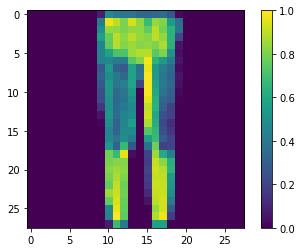

In [ ]:
predictions = model.predict(test_images)
test_number = int(input("Enter number of image you want to test "))
predictions[test_number]
np.argmax(predictions[test_number])
print("---------------------------------------------------------")
print("Predicted class is " + class_names[np.argmax(predictions[test_number])])
print("Actual class is " + class_names[test_labels[test_number]])
print("---------------------------------------------------------")
print("Image is")
plt.figure()
plt.imshow(test_images[test_number])
plt.colorbar()
plt.grid(False)
plt.show()